#### Simple Linear Regression Project based on height-weight dataset

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df=pd.read_csv('weight-height.csv')

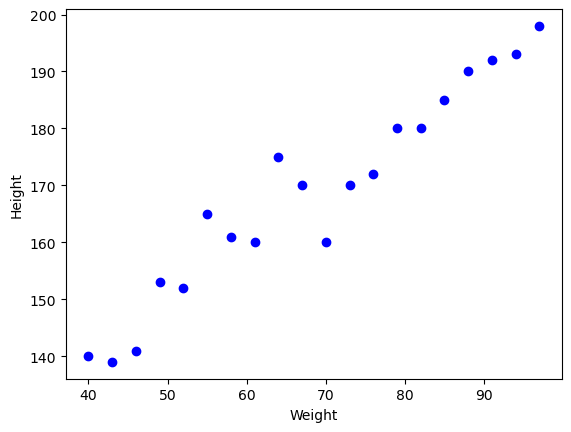

In [5]:
### scatter plot
plt.scatter(df['Weight'],df['Height'],color="b")
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [6]:
X=df[['Weight']] ## independent features should be in data frame or 2-d 

Y=df['Height'] # dependent/ variable should be in series or 1d array

In [7]:
##  Train Test Split
from sklearn.model_selection import train_test_split     

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
X.shape

(20, 1)

In [11]:
X_train.shape

(16, 1)

In [16]:
## Standardization , it means u = 0 and sigma = 1 (normalizee)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [22]:
X_train

array([[-0.35612994],
       [-0.94558639],
       [ 0.23332651],
       [-1.33855735],
       [ 1.60872489],
       [ 1.21575393],
       [ 0.62629748],
       [-1.53504284],
       [-0.15964445],
       [ 1.80521037],
       [-1.14207187],
       [ 0.42981199],
       [-0.55261542],
       [ 0.03684103],
       [ 0.82278296],
       [-0.7491009 ]])

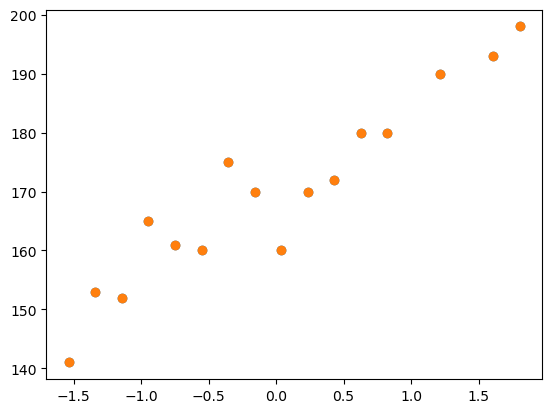

In [25]:
plt.scatter(X_train,Y_train)
plt.show()

In [26]:
## train model , simple linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [28]:
print("Coefficient or slope :",regression.coef_)

Coefficient or slope : [14.36800094]


In [29]:
print("Intercept :",regression.intercept_)

Intercept : 170.0


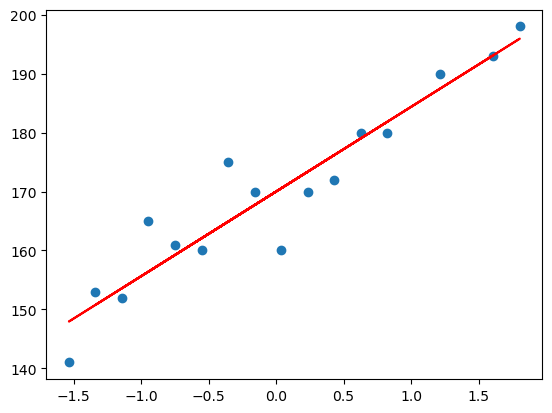

In [32]:
## plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train),'r-')
plt.show()

### prediction of test data 
1. predicted height output = intercept + slope(X_test)
2. Y_pred=169.66 + 15.02(X_test)

In [33]:
Y_pred=regression.predict(X_test)

In [34]:
Y_pred

array([142.29829588, 190.29105716, 184.64484995, 145.12139949])

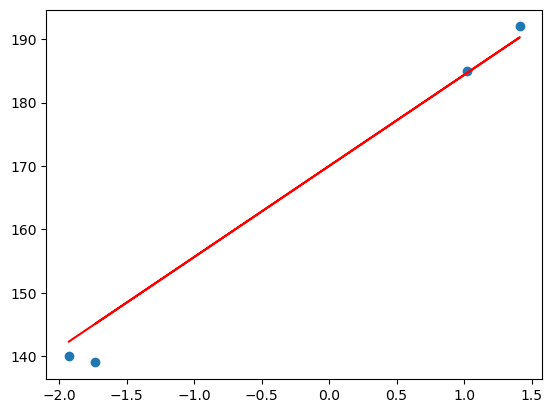

In [36]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regression.predict(X_test),'r')
plt.show()

In [39]:
# Performance metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

11.450078213268238
2.6209470668074104
3.383796420186687


# R^2 Square
R^2 = 1 -SSR/SST
ssr = sum of squres of residuals
sst = total sum of squares

## adjusted r^2 Square 
adjusted R2 = 1- [(1-r2)*(n-1)/(n-k-1)]

#R2 score

In [40]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print(score)

0.9811210581809262


In [41]:
# adjusted r2 score
1 -(1-score)*(len(Y_test-1))/(len(Y_test)-X_test.shape[1]-1)

0.9622421163618524

# For New datapoints

In [ ]:
## prediction for new data
scaled_weight=scaler.transform([[80]])


In [48]:
scaled_weight[0]

array([80.])

In [56]:
print(regression.predict([scaled_weight[0]]))

[1319.44007534]


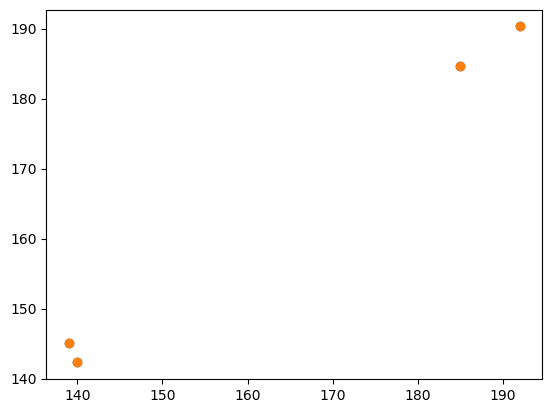

In [58]:
## Assumptions
plt.scatter(Y_test,Y_pred)
plt.show()

In [59]:
## Residuals
residuals=Y_test-Y_pred
residuals

0    -2.298296
17    1.708943
15    0.355150
1    -6.121399
Name: Height, dtype: float64

C:\Users\arjun\AppData\Local\Temp\ipykernel_16944\528563744.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


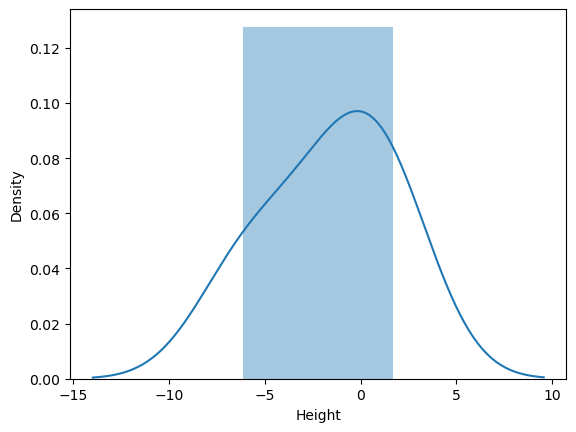

In [64]:
## plot this residuals
import seaborn as sns              
sns.distplot(residuals,kde=True)
plt.show()

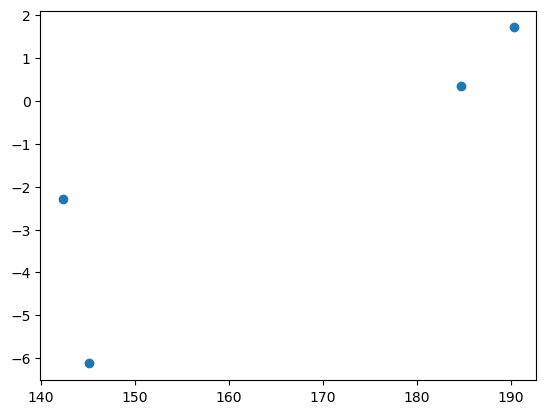

In [65]:
plt.scatter(Y_pred,residuals)
plt.show()